In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/i550012/virtualenv/tensorflow1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/i550012/virtualenv/tensorflow1

In [2]:
input_1d_x = np.array([1,2,3.0,4,5, 126, 21, 33, 6, 73, 2,4, 56, 98, 100,5,7,9, 128, 42, 123])

In [3]:
def input_fn_1d(input_1d):
    input_t = tf.convert_to_tensor(input_1d, dtype=tf.float32)
    input_t = tf.expand_dims(input_t, 1)
    return (input_t, None)


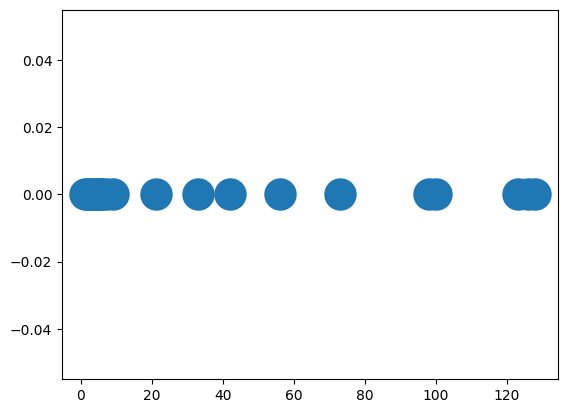

In [4]:
plt.scatter(input_1d_x, np.zeros_like(input_1d_x), s=500)
plt.show()


In [5]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

In [6]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=3)

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14e99fd10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed':

In [7]:
fit = k_means_estimator.fit(input_fn=lambda: input_fn_1d(input_1d_x), steps=1000 )

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmp_laa63nn/model.ckpt.


2024-04-11 03:52:14.857476: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


INFO:tensorflow:loss = 7742.0, step = 1
INFO:tensorflow:global_step/sec: 995.182
INFO:tensorflow:loss = 3056.392, step = 101 (0.101 sec)
INFO:tensorflow:global_step/sec: 2169.3
INFO:tensorflow:loss = 3050.5735, step = 201 (0.046 sec)
INFO:tensorflow:global_step/sec: 1648.89
INFO:tensorflow:loss = 3049.4583, step = 301 (0.061 sec)
INFO:tensorflow:global_step/sec: 1964.4
INFO:tensorflow:loss = 3045.8813, step = 401 (0.051 sec)
INFO:tensorflow:global_step/sec: 2428.26
INFO:tensorflow:loss = 2801.6824, step = 501 (0.041 sec)
INFO:tensorflow:global_step/sec: 2537.36
INFO:tensorflow:loss = 2590.1667, step = 601 (0.039 sec)
INFO:tensorflow:global_step/sec: 2502.12
INFO:tensorflow:loss = 2461.0806, step = 701 (0.040 sec)
INFO:tensorflow:global_step/sec: 1036.35
INFO:tensorflow:loss = 2376.4827, step = 801 (0.097 sec)
INFO:tensorflow:global_step/sec: 2496.86
INFO:tensorflow:loss = 2318.0154, step = 901 (0.040 sec)
INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/nl/yn0d4tg1107g2jk3

In [8]:
clusters_1d = k_means_estimator.clusters()
clusters_1d

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.


array([[ 45.440407 ],
       [111.62907  ],
       [  5.2319098]], dtype=float32)

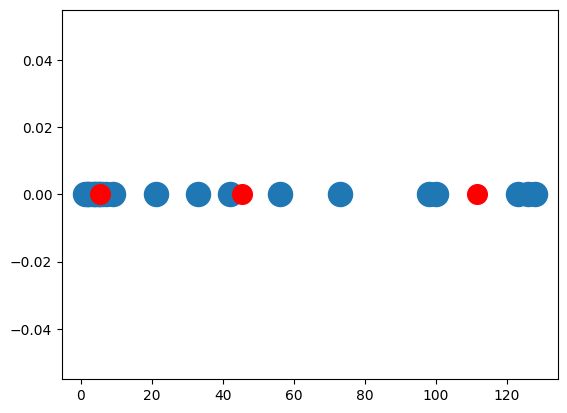

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_1d_x, np.zeros_like(input_1d_x), s=300, marker='o')
ax1.scatter(clusters_1d, np.zeros_like(clusters_1d), c='r', s=200, marker='o')

plt.show()


In [10]:
k_means_estimator.get_params()

{'params': {'num_clusters': 3,
  'training_initial_clusters': 'random',
  'distance_metric': 'squared_euclidean',
  'random_seed': 0,
  'use_mini_batch': True,
  'mini_batch_steps_per_iteration': 1,
  'kmeans_plus_plus_num_retries': 2,
  'relative_tolerance': None}}

In [12]:
for name in fit.get_variable_names():
    print(name, fit.get_variable_value(name))

Variable [ 3975  5436 11592]
clusters [[ 45.440407 ]
 [111.62907  ]
 [  5.2319098]]
global_step 1000
initialized True


In [13]:
ex_1d_x = np.array([0,100], dtype=np.float32)
transform = k_means_estimator.transform(input_fn=lambda: input_fn_1d(ex_1d_x))

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmp_laa63nn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [15]:
np.sqrt(transform)

array([[ 45.440407 , 111.62907  ,   5.2319098],
       [ 54.559597 ,  11.629115 ,  94.76809  ]], dtype=float32)

In [16]:
predict = k_means_estimator.predict(input_fn=lambda: input_fn_1d(ex_1d_x), as_iterable=False)



INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmp_laa63nn/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
predict

{'all_scores': array([[ 2064.8306  , 12461.049   ,    27.372879],
        [ 2976.7495  ,   135.23633 ,  8980.991   ]], dtype=float32),
 'cluster_idx': array([2, 1])}